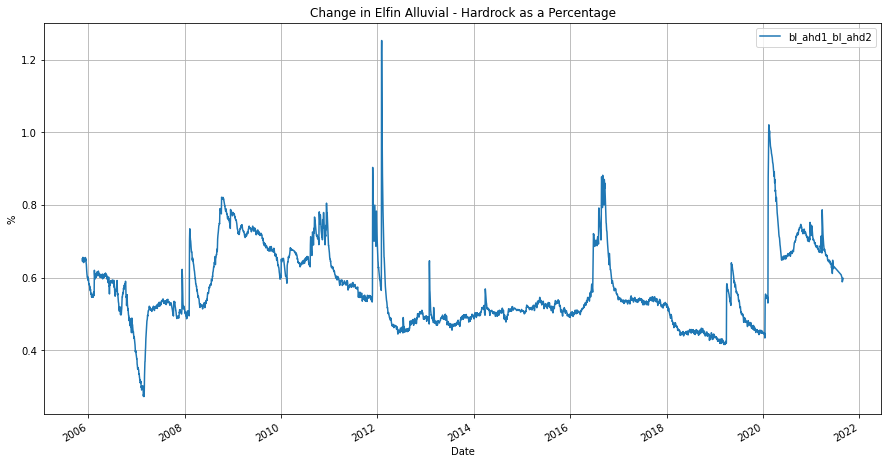

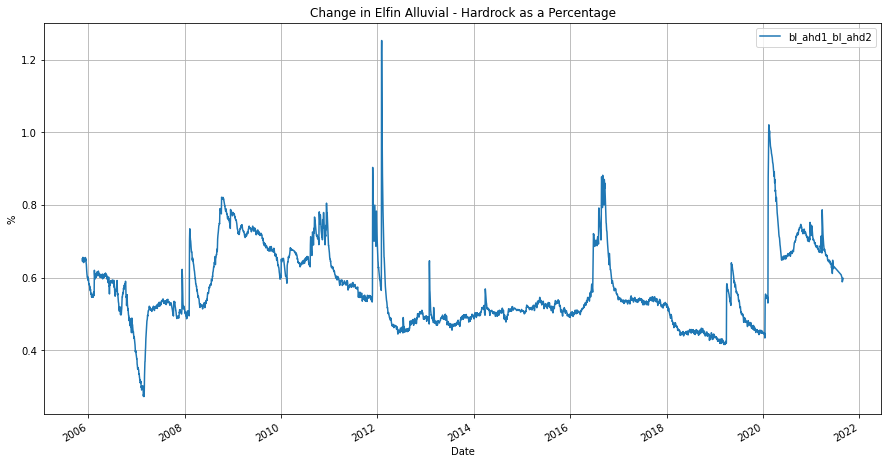

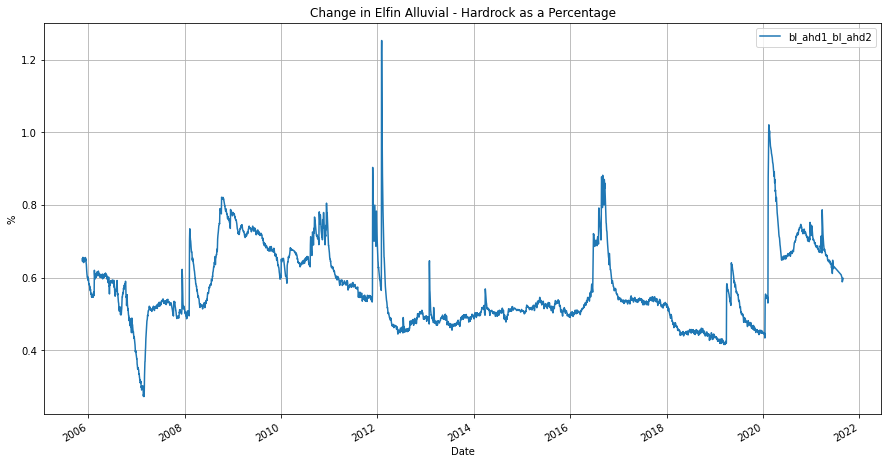

In [1]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




def mysqlconnect(): 
    # To connect MySQL database 

    
    connection = pymysql.connect(
        # host='192.168.208.1',
        host='192.168.11.6',
        user='root', 
        password='water',
        database='waterdata',
        port=30000)
    
    
    dt = 0.01
    
    try:
        with connection.cursor() as cursor:
                   
            sql1 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                            `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                            
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "419051" AND `C`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `rainfall` `D` ON (`D`.`meter_no` = "054151-2" AND `D`.`read_date` = `A`.`read_date` )
                        WHERE  
                            `A`.`meter_no` = "GW967137.1.1"
                        ''')
            
            
            sql2 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                            `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                            
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967138.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "419051" AND `C`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `rainfall` `D` ON (`D`.`meter_no` = "054151-2" AND `D`.`read_date` = `A`.`read_date` )
                        WHERE  
                            `A`.`meter_no` = "GW967138.1.1" AND `B`.`bl_ahd` > 0
                        ''')
            
            
            
            sql3 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                            `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "419051" AND `C`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `rainfall` `D` ON (`D`.`meter_no` = "054151-2" AND `D`.`read_date` = `A`.`read_date` )
                        WHERE  
                            `A`.`meter_no` = "GW967137.1.1"
                        ''')
            
       
        
        df1_orig = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)  ## , index_col="A.read_date"
        df2_orig = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        
        #filter out incomplete rows from the groundwater series start date
        
        df1 = df1_orig[df1_orig['read_date'] >= '2005-11-17']
        df2 = df2_orig[df2_orig['read_date'] >= '2007-09-06']
        
        df1.to_csv('elfin.csv', index=False)
        df2.to_csv('greengully.csv', index=False)
        
        #calculate the bore level change for 1 day, 1 week and 1 month
        
        # setup date deltas
        
        day_0 = (df1['read_date'])
        
        day_1 = (day_0) - pd.DateOffset(days=1)
        day_7 = (day_0) - pd.DateOffset(days=7)
        day_14 = (day_0) - pd.DateOffset(days=14)
        day_30 = (day_0) - pd.DateOffset(days=30)
        
        
        #Elfin
        
        # correct data types
        
        df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'] )
        df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])
        df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])
        df1['rf_read1'] = pd.to_numeric(df1['rf_read1'])
        
        #calculate change in bore levels for each date delta
        
        E_bl_ahd1_dt1 = df1['bl_ahd1'].shift(-1) - df1['bl_ahd1']
        E_bl_ahd1_dt7 = df1['bl_ahd1'].shift(-7) - df1['bl_ahd1']
        E_bl_ahd1_dt14 = df1['bl_ahd1'].shift(-14) - df1['bl_ahd1']
        E_bl_ahd1_dt30 = df1['bl_ahd1'].shift(-30) - df1['bl_ahd1']
        
        
        # GW967137.2.2
        
        E_bl_ahd2_dt1 = df1['bl_ahd2'].shift(-1) - df1['bl_ahd2']
        E_bl_ahd2_dt7 = df1['bl_ahd2'].shift(-7) - df1['bl_ahd2']
        E_bl_ahd2_dt14 = df1['bl_ahd2'].shift(-14) - df1['bl_ahd2']
        E_bl_ahd2_dt30 = df1['bl_ahd2'].shift(-30) - df1['bl_ahd2']
        
       
#        df1['rf_read_sl_read'] = ((df1['rf_read1'] - df1['bl_ahd1']) / df1['sl_read1']) * 100 
#        df1['sl_read_bl_ahd1'] = ((df1['sl_read1'] - df1['bl_ahd1']) / df1['sl_read1']) * 100
        df1['bl_ahd1_bl_ahd2'] = ((df1['bl_ahd1'] - df1['bl_ahd2']) / df1['bl_ahd1']) * 100
        df1['bl_ahd1_bl_ahd2'] = ((df1['bl_ahd1'] - df1['bl_ahd2']) / df1['bl_ahd1']) * 100
        df1['bl_ahd1_bl_ahd2'] = ((df1['bl_ahd1'] - df1['bl_ahd2']) / df1['bl_ahd1']) * 100
       
        
              
    
    # Page 1 - Actual Readings and for Elfin, Green Gully
    
#        df1.plot(x='read_date', y=['sl_read_bl_ahd1'],figsize=(15,8), grid=True, title='Change in Elfin Surface Water - Alluvial as a Percentage', xlabel='Date',ylabel='%')
        df1.plot(x='read_date', y=['bl_ahd1_bl_ahd2'],figsize=(15,8), grid=True, title='Change in Elfin Alluvial - Hardrock as a Percentage', xlabel='Date',ylabel='%')
        df1.plot(x='read_date', y=['bl_ahd1_bl_ahd2'],figsize=(15,8), grid=True, title='Change in Elfin Alluvial - Hardrock as a Percentage', xlabel='Date',ylabel='%')
        df1.plot(x='read_date', y=['bl_ahd1_bl_ahd2'],figsize=(15,8), grid=True, title='Change in Elfin Alluvial - Hardrock as a Percentage', xlabel='Date',ylabel='%')
    
        
      
    except:
        print("Error: unable to convert the data")

    connection.close()
  
# Driver Code 
if __name__ == "__main__" : 
    mysqlconnect()